In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.transforms import Affine2D
from pytrends.request import TrendReq


In [4]:
Altcoin_Index = yf.download(["BTC-USD", "ETH-USD", "XRP-USD", "BNB-USD" "SOL-USD", "DOGE-USD", "TRX-USD", "ADA-USD", "SUI-USD"  "LINK-USD", "AVAX-USD", "XLM-USD", "LEO-USD", "BCH-USD", "TON11419-USD", "SHIB-USD", "HBAR-USD", "LTC-USD", "DOT-USD", "XMR-USD"], start="2011-01-01", end="2025-05-27",)['Close']
print(Altcoin_Index.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  18 of 18 completed

2 Failed downloads:
['BNB-USDSOL-USD', 'SUI-USDLINK-USD']: HTTPError('HTTP Error 404: ')


Ticker      ADA-USD  AVAX-USD  BCH-USD  BNB-USDSOL-USD     BTC-USD  DOGE-USD  \
Date                                                                           
2014-09-17      NaN       NaN      NaN             NaN  457.334015       NaN   
2014-09-18      NaN       NaN      NaN             NaN  424.440002       NaN   
2014-09-19      NaN       NaN      NaN             NaN  394.795990       NaN   
2014-09-20      NaN       NaN      NaN             NaN  408.903992       NaN   
2014-09-21      NaN       NaN      NaN             NaN  398.821014       NaN   

Ticker      DOT-USD  ETH-USD  HBAR-USD  LEO-USD  LTC-USD  SHIB-USD  \
Date                                                                 
2014-09-17      NaN      NaN       NaN      NaN  5.05855       NaN   
2014-09-18      NaN      NaN       NaN      NaN  4.68523       NaN   
2014-09-19      NaN      NaN       NaN      NaN  4.32777       NaN   
2014-09-20      NaN      NaN       NaN      NaN  4.28644       NaN   
2014-09-21      NaN

In [7]:
Scaled_Index = (Altcoin_Index - Altcoin_Index.min()) / (Altcoin_Index.max() - Altcoin_Index.min())

In [9]:
print(Scaled_Index.tail())

Ticker       ADA-USD  AVAX-USD   BCH-USD  BNB-USDSOL-USD   BTC-USD  DOGE-USD  \
Date                                                                           
2025-05-22  0.266339  0.169682  0.095316             NaN  1.000000  0.356847   
2025-05-23  0.245364  0.152887  0.090548             NaN  0.960667  0.327283   
2025-05-24  0.245640  0.152491  0.089588             NaN  0.965181  0.327989   
2025-05-25  0.249984  0.156016  0.089839             NaN  0.976341  0.327531   
2025-05-26  0.249838  0.153208  0.087961             NaN  0.979973  0.329054   

Ticker       DOT-USD   ETH-USD  HBAR-USD   LEO-USD   LTC-USD  SHIB-USD  \
Date                                                                     
2025-05-22  0.040610  0.545679  0.392251  0.884911  0.257272    0.1875   
2025-05-23  0.032929  0.516550  0.363044  0.873429  0.243926    0.1750   
2025-05-24  0.032795  0.517439  0.359880  0.875736  0.245342    0.1750   
2025-05-25  0.032350  0.521906  0.359225  0.883972  0.245269    0.175

In [11]:
Scaled_Index["Mean"] = Scaled_Index.mean(axis=1)

In [25]:
#compare an individual asset against the mean and calculate rolling correlation coefficient
rolling_window = 14
rolling_corr = Scaled_Index["DOGE-USD"].rolling(rolling_window).corr(Scaled_Index["Mean"])

In [26]:
buy_signal = rolling_corr < 0.2
sell_signal = rolling_corr > 0.2

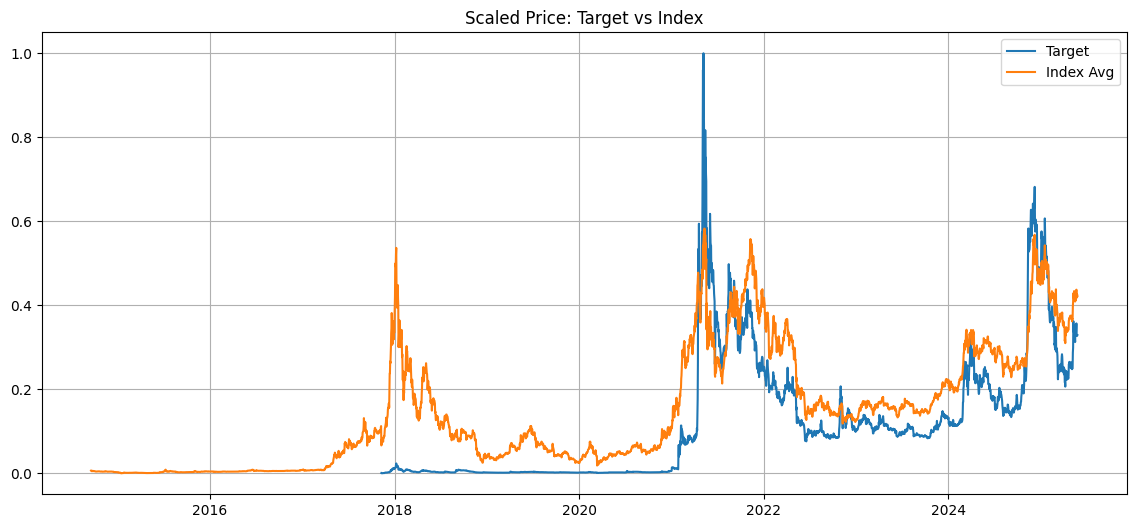

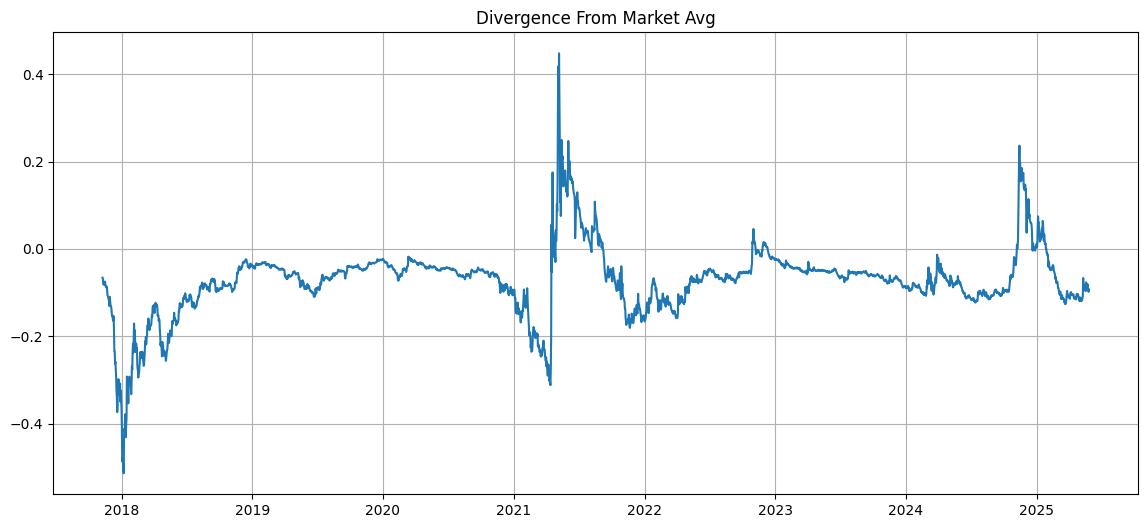

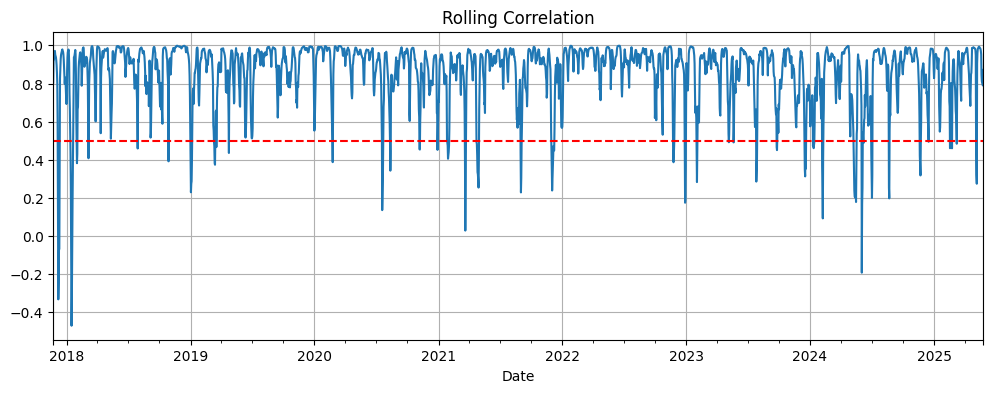

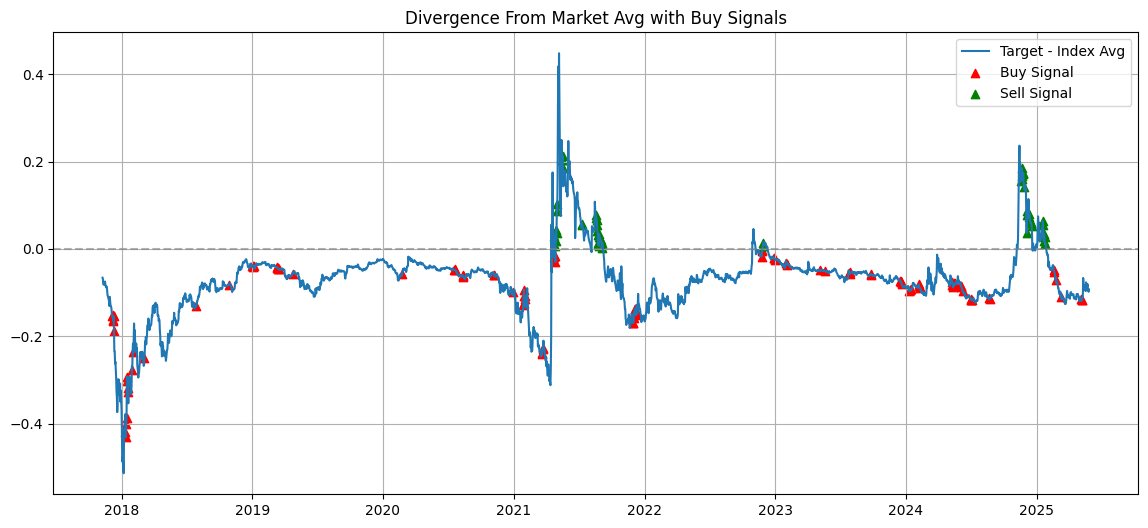

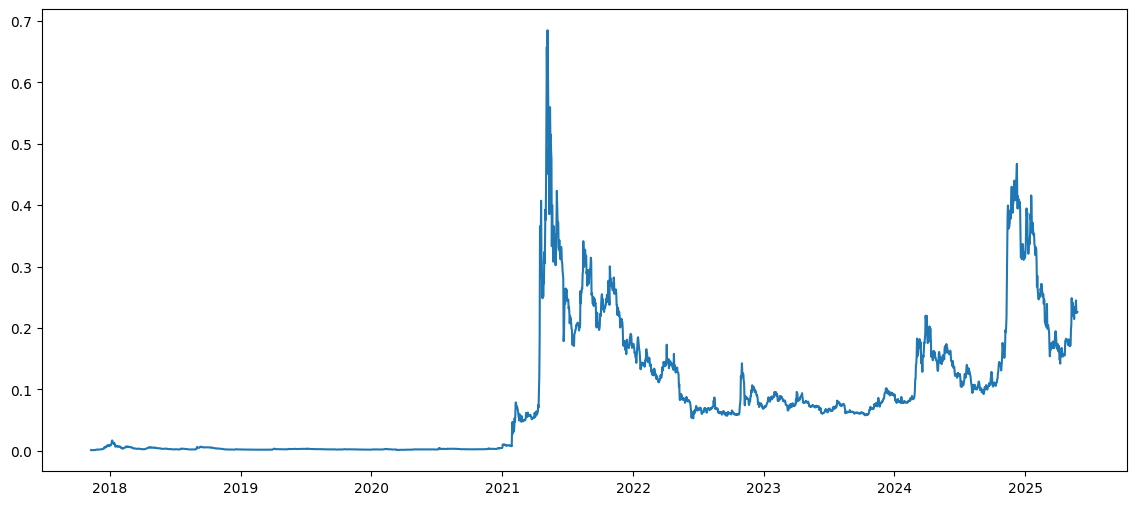

In [51]:




plt.figure(figsize=(14, 6))
plt.plot(Scaled_Index["DOGE-USD"], label='Target')
plt.plot(Scaled_Index["Mean"], label='Index Avg')
plt.legend()
plt.title('Scaled Price: Target vs Index')
plt.grid(True)
plt.show()

Divergence = Scaled_Index["DOGE-USD"] - Scaled_Index["Mean"]

#read this as 'below 0 is a buy signal because we expect the target asset to eventually revert toward the market average
plt.figure(figsize=(14, 6))
plt.plot(Divergence, label='Target')
plt.title('Divergence From Market Avg')
plt.grid(True)
plt.show()

rolling_corr.index = pd.to_datetime(rolling_corr.index, errors='coerce')

# Drop any rows with missing timestamps or NaN values
rolling_corr = rolling_corr.dropna()
rolling_corr = rolling_corr[rolling_corr.index.notnull()]

fig, ax = plt.subplots(figsize=(12, 4))
rolling_corr.plot(ax=ax)  # <-- tell pandas to use your axes
ax.axhline(0.5, color='red', linestyle='--')
ax.grid(True)
ax.set_title('Rolling Correlation')
plt.show()

buy_signals = (Divergence < 0) & (rolling_corr < 0.5)
sell_signals = (Divergence > 0) & (rolling_corr < 0.8)

plt.figure(figsize=(14, 6))
plt.plot(Divergence, label='Target - Index Avg')
plt.scatter(Divergence[buy_signals].index, Divergence[buy_signals], color='red', label='Buy Signal', marker='^')
plt.scatter(Divergence[sell_signals].index, Divergence[sell_signals], color='green', label='Sell Signal', marker='^')
plt.axhline(0, color='gray', linestyle='--', alpha=0.6)
plt.title('Divergence From Market Avg with Buy Signals')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(Altcoin_Index["DOGE-USD"], label='Asset Actual Price')